In [ ]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [ ]:
df = pd.read_csv("./water_potability.csv")

In [ ]:
df.head()


In [ ]:
np.shape(df)

In [ ]:
print("Number of null values in different columns")
print(df.isna().sum())

In [ ]:
df=df.dropna()

In [ ]:
# df.loc[(df['ph'].isna() == True), 'ph'] = df['ph'].mean()
# df.loc[(df['Sulfate'].isna() == True), 'Sulfate'] = df['Sulfate'].mean()
# df.loc[(df['Trihalomethanes'].isna() == True), 'Trihalomethanes'] = df['Trihalomethanes'].mean()

In [ ]:
np.shape(df)

In [ ]:
print("Number of null values after dropping null values")
print(df.isna().sum())

In [ ]:
df.describe()

In [ ]:
df.reset_index(inplace=True)
df=df.drop(['index'],axis=1)

In [ ]:
df.groupby("Potability").count()

In [ ]:
y = df['Potability']
X = df.drop(['Potability'],axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [ ]:
print('Size Training Set: {}'.format(len(X_train)))
print('Size Testing Set: {}'.format(len(X_test)))

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss",mode = 'auto',patience=15)

In [146]:
#test 1

model = keras.Sequential()
model.add(layers.Dense(20,input_dim=9, activation='relu'))
model.add(layers.Dense(16))
model.add(layers.Dense(15))
model.add(layers.Dense(10))
model.add(layers.Dense(5))
model.add(layers.Dense(1))

opt = keras.optimizers.Adamax(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=75, epochs=400, validation_data=(X_test, y_test),callbacks=[early_stopping])
# history = model.fit(X_train, y_train, batch_size=75, epochs=400, validation_data=(X_test, y_test))


Train on 57916 samples, validate on 6436 samples
Epoch 1/400
57916/57916 [==============================] - 3s 48us/sample - loss: 0.2392 - acc: 0.6052 - val_loss: 0.2273 - val_acc: 0.6293
Epoch 2/400
57916/57916 [==============================] - 2s 36us/sample - loss: 0.2200 - acc: 0.6555 - val_loss: 0.2060 - val_acc: 0.6969
Epoch 3/400
57916/57916 [==============================] - 2s 36us/sample - loss: 0.2084 - acc: 0.6813 - val_loss: 0.1985 - val_acc: 0.7034
Epoch 4/400
57916/57916 [==============================] - 2s 35us/sample - loss: 0.2029 - acc: 0.6908 - val_loss: 0.1990 - val_acc: 0.6993
Epoch 5/400
57916/57916 [==============================] - 2s 32us/sample - loss: 0.2014 - acc: 0.6917 - val_loss: 0.2002 - val_acc: 0.7067
Epoch 6/400
57916/57916 [==============================] - 2s 32us/sample - loss: 0.2009 - acc: 0.6911 - val_loss: 0.1941 - val_acc: 0.7004
Epoch 7/400
57916/57916 [==============================] - 2s 35us/sample - loss: 0.1986 - acc: 0.6965 - val_lo

In [147]:
import matplotlib.pyplot as plt

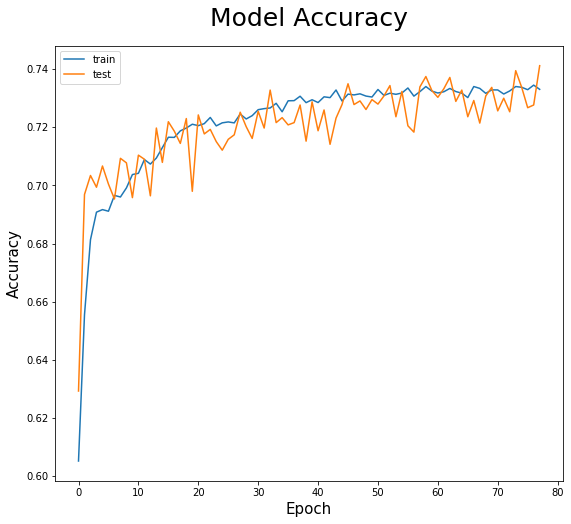

In [148]:
plt.figure(figsize=[20,8])

plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')

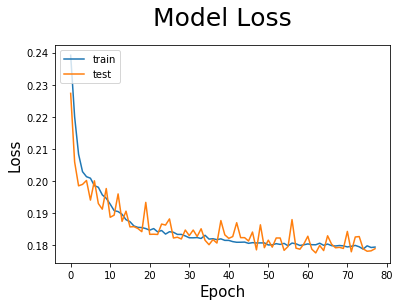

In [149]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')

In [150]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [151]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

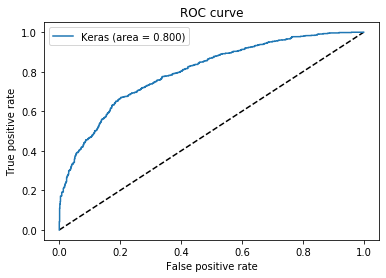

In [152]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [153]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

In [154]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [155]:
import seaborn as sns


Text(0.5, 15.0, 'Predicted label')

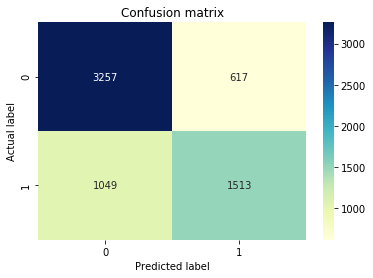

In [156]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')